In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_final.csv')

In [3]:
df.shape

(5270, 73)

In [4]:
df.describe()

,commande,agrumes,ail,assortiment,aubergine,autre,betterave,beurre,blette,breuil,...,savon,soupe,tisane,tomate,tomme de vache fraîche,viande de chèvre ou chevreau,viande de porc,viande de veau,vin ou cidre,yaourt
count,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,...,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000
mean,4474.715560,0.310247,0.051044,0.020683,0.035674,0.000380,0.049905,0.360152,0.066414,0.096584,...,0.038330,0.012144,0.026186,0.107780,0.010816,0.272296,0.196964,0.042884,0.061101,1.060721
std,1583.315004,0.747457,0.220108,0.142335,0.185493,0.019479,0.217770,0.536472,0.249027,0.295419,...,0.209952,0.109540,0.188080,0.310132,0.103446,0.583225,0.616646,0.260774,0.285117,1.246028
min,1743.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3100.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4460.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5853.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,7205.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,5.000000,1.000000,1.000000,5.000000,6.000000,4.000000,4.000000,7.000000


In [ ]:
# Essai Kmeans

In [5]:
# Standardisation
from sklearn import preprocessing
df_standardized = preprocessing.scale(df)
df_standardized = pd.DataFrame(df_standardized)

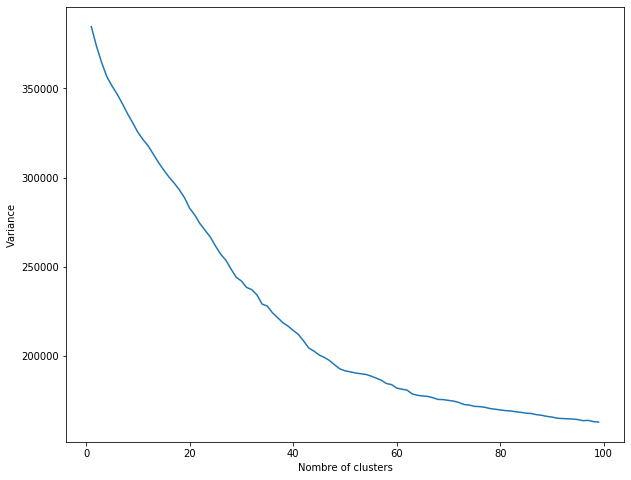

In [11]:
# On essaie de trouver le nombre de cluster approprié
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
variance = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_standardized)
    variance.append(kmeans.inertia_)
plt.plot(range(1, 100), wcss)
plt.xlabel('Nombre of clusters')
plt.ylabel('Variance')
plt.show()